### 캐글러 따라하기
 -  https://www.kaggle.com/jihyeseo/seoulairreport
#### 서울 공기오염 예측하기

Load Dataset

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = [16, 12]
df = pd.read_csv('C:/Users/wtime/Downloads/MACHINE_LEARING/SeoulHourlyAvgAirPollution.csv')

In [2]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [3]:
df.columns = ['Time', 'Location', 'NO2', 'O3', 'CO', 'SO2', 'Fine Dust', 'Ultrafine Dust']

In [4]:
df['Time'] = pd.to_datetime(df['Time'], format = '%Y%m%d%H%M')

In [5]:
df.describe()

,NO2,O3,CO,SO2,Fine Dust,Ultrafine Dust
count,4187.000000,4183.000000,4183.000000,4187.000000,4166.000000,4161.000000
mean,0.028922,0.013460,0.561009,0.004693,36.724436,19.882480
std,0.015733,0.009577,0.236955,0.001304,22.585665,12.798846
min,0.005000,0.001000,0.100000,0.002000,5.000000,3.000000
25%,0.015000,0.004000,0.400000,0.004000,22.000000,10.000000
50%,0.026000,0.012000,0.500000,0.005000,30.000000,15.000000
75%,0.041000,0.021000,0.700000,0.006000,46.000000,27.000000
max,0.092000,0.042000,1.800000,0.010000,228.000000,85.000000


In [6]:
df.groupby('Location').describe()

NO2                                                              \
          count      mean       std    min      25%     50%      75%    max   
Location                                                                      
강남구       169.0  0.031024  0.015022  0.010  0.01700  0.0300  0.04200  0.071   
강동구       167.0  0.034108  0.016516  0.010  0.01800  0.0320  0.04850  0.078   
강북구       167.0  0.025521  0.018897  0.005  0.00900  0.0200  0.04100  0.068   
강서구       167.0  0.036844  0.020319  0.009  0.01900  0.0330  0.05250  0.092   
관악구       168.0  0.031065  0.015039  0.008  0.01800  0.0320  0.04200  0.067   
광진구       165.0  0.028697  0.013730  0.010  0.01600  0.0260  0.04000  0.063   
구로구       168.0  0.022071  0.009361  0.007  0.01400  0.0225  0.03000  0.044   
금천구       169.0  0.031272  0.014200  0.009  0.01900  0.0300  0.04300  0.068   
노원구       167.0  0.029162  0.016501  0.007  0.01400  0.0270  0.04300  0.072   
도봉구       169.0  0.023598  0.016579  0.005  0.00800  0.0180  0.03900  0.067   
동대문구      169.0  0.026544  0.015963  0.007  0.01200  0.0240  0.04000  0.076   
동작구       169.0  0.032769  0.016380  0.009  0.01800  0.0290  0.04600  0.070   
마포구       167.0  0.028263  0.015993  0.005  0.01350  0.0260  0.04000  0.075   
서대문구      167.0  0.020347  0.006623  0.011  0.01400  0.0200  0.02500  0.041   
서초구       168.0  0.026214  0.014067  0.005  0.01400  0.0240  0.03800  0.061   
성동구       169.0  0.027355  0.013383  0.008  0.01500  0.0260  0.03800  0.061   
성북구       169.0  0.031491  0.017512  0.008  0.01500  0.0290  0.04800  0.077   
송파구       168.0  0.028375  0.015357  0.009  0.01400  0.0240  0.04200  0.070   
양천구       156.0  0.032603  0.016702  0.009  0.01800  0.0310  0.04400  0.081   
영등포구      169.0  0.026722  0.010469  0.010  0.01800  0.0250  0.03300  0.059   
용산구       167.0  0.029192  0.014173  0.008  0.01700  0.0260  0.04000  0.066   
은평구       168.0  0.029756  0.014431  0.010  0.01700  0.0275  0.04025  0.064   
종로구       168.0  0.031946  0.018423  0.008  0.01400  0.0300  0.04600  0.083   
중구        169.0  0.028976  0.016381  0.006  0.01500  0.0260  0.04100  0.071   
중랑구       168.0  0.029405  0.015094  0.008  0.01575  0.0270  0.04125  0.070   

             O3            ... Fine Dust        Ultrafine Dust             \
          count      mean  ...       75%    max          count       mean   
Location                   ...                                              
강남구       169.0  0.010166  ...     47.00  141.0          169.0  20.739645   
강동구       167.0  0.012683  ...     52.75  180.0          167.0  19.706587   
강북구       167.0  0.020174  ...     48.00  127.0          167.0  17.748503   
강서구       167.0  0.016078  ...     41.75  144.0          168.0  19.250000   
관악구       168.0  0.010869  ...     39.75  127.0          165.0  15.436364   
광진구       165.0  0.016230  ...     48.00  159.0          166.0  22.981928   
구로구       168.0  0.009548  ...     40.00  168.0          165.0  18.763636   
금천구       169.0  0.013160  ...     41.00  143.0          169.0  21.674556   
노원구       167.0  0.015246  ...     53.00  120.0          166.0  23.283133   
도봉구       169.0  0.017207  ...     44.50  132.0          168.0  17.648810   
동대문구      169.0  0.010201  ...     44.00  143.0          169.0  16.041420   
동작구       169.0  0.013361  ...     48.00  172.0          169.0  24.124260   
마포구       167.0  0.013006  ...     36.00  126.0          166.0  19.060241   
서대문구      167.0  0.014844  ...     40.00  182.0          168.0  19.035714   
서초구       168.0  0.011560  ...     54.00  228.0          164.0  22.384146   
성동구       165.0  0.010976  ...     48.50  202.0          161.0  22.689441   
성북구       169.0  0.013432  ...     52.50  144.0          167.0  19.796407   
송파구       168.0  0.014500  ...     51.00  192.0          165.0  22.921212   
양천구       156.0  0.011654  ...     61.00  156.0          156.0  26.557692   
영등포구      169.0  0.012722  ...     52.00  198.0          166.0  16.397590   
용산구       167.0  0.011832  .

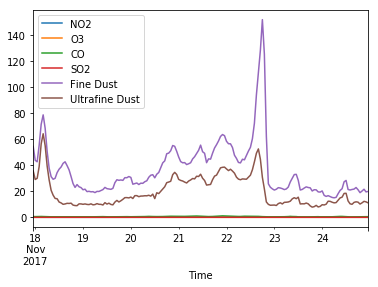

In [7]:
df.groupby('Time').mean().plot()